In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% ! important;}
div.cell.code_cell.rendered{width:100%}
div.input_prompt{padding:0px}
div.CodeMirror {font-family:Consolas ; font-size:12pt;}
div.text_cell_render.rendered_html {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold}
div.input {font-family:Consolas ; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch.10 N차원 배열(numpy배열)다루기_4절~6절</font></b>
# 4절 복사와 뷰
## 4.1 할당

In [3]:
import numpy as np
a= np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
b=a

In [6]:
a.shape, a.ndim, id(a),type(a)

((12,), 1, 2148721079856, numpy.ndarray)

In [7]:
b.shape, b.ndim, id(b),type(b)

((12,), 1, 2148721079856, numpy.ndarray)

In [8]:
a is b

True

In [9]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [11]:
np.all(a==b)

True

In [12]:
b.shape= (3,4) # 할당받은 b의 shape 수정

In [13]:
a.shape, a.ndim, id(a),type(a)

((3, 4), 2, 2148721079856, numpy.ndarray)

In [14]:
b.shape, b.ndim, id(b),type(b)

((3, 4), 2, 2148721079856, numpy.ndarray)

In [15]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## 4.2 앝은 복사 : 뷰(View)

In [19]:
a =  np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
c=a.view()
print(id(a),id(c))

2148780131792 2148780132464


In [22]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [24]:
c.shape=(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c[1,::2]=[9,9,9] # 1행의 짝수번째 열 변경(9)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [28]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3 깊은 복사

In [42]:
a = np.array([[5,4,13,0], [99,6,16,1], [20,5,14,0]])
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [46]:
# X = a[:,:-1] # 슬라이싱이 될 때, 뷰가 반환됨(얕은 복사)
X=a[:,:-1].copy() # 깊은 복사
# X=np.array(a[:,:-1], copy=True)
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [44]:
X[:,0] = -9 
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [47]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5절 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [4]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [6]:
a[[0,5,9]] # 불규칙한 값을 찾기

array([ 0, 25, 81])

In [7]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0, 1, 1, 9])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라 감

array([ 0,  1,  1, 81])

In [8]:
i = np.array([[0,1],
              [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [9]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [10]:
a[i] += 10 # 1번 인덱스는 한번만 10 증가
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [14]:
# 색상                R  G  B
palette = np.array([[0, 0, 0], # black
                   [255,0,0],  # red 
                   [0,255,0],  # green
                   [0,0,255],  # blue 
                   [255,255,255]]) # write

In [15]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data =  palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

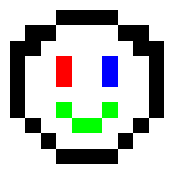

In [23]:
from matplotlib import pyplot as plt
# import matplot.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [24]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [25]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [26]:
a[[ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False]]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [27]:
a[a%2==0] # 논리배열을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [28]:
a[a>15]

array([16, 17, 18, 19])

# 6절 선형대수
- 2차원 numpy 배열을 행렬
    * 행렬곱 : @
    * 단위행렬 : np.eye(n) : n행n열 단위행렬
    * 전치행렬 : X.T, X.transpose()
    * 역행렬 : np.linalg.inv(X)

In [29]:
a=np.array([[1,2],
           [3,4]])
a

array([[1, 2],
       [3, 4]])

In [30]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [31]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [36]:
# 정방행렬이 아니면 역행렬을 구할 수 없음
a=np.array([[1,2,1],
           [3,4,1]])
# np.linalg.inv(a) error
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [34]:
# 전치행렬을 곱하면 정방행렬로
a @ a.T

array([[ 6, 12],
       [12, 26]])

## 6.1 선형 연립 방정식 풀기(단변량 회귀분석): 독립변수1, 데이터2

In [9]:
import numpy as np
x = np.array([2,4]) # 공부량 : 독립변수
y = np.array([40,60]) # 점수 : 종속변수(타겟변수)
X = np.c_[x,np.ones(len(x))] # X = np.column_stack((x, np.ones(len(x))))도 가능
Y=y.reshape(-1,1)
X, Y

(array([[2., 1.],
        [4., 1.]]),
 array([[40],
        [60]]))

In [10]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @Y
# wb = X의 역행렬 @Y
wb = np.linalg.inv(X) @ Y
wb

array([[10.],
       [20.]])

In [14]:
x_ =np.linspace(0,10,100) # 0부터 10 까지 100개 데이터
h = wb[0]*x_ + wb[1]
h = np.add(np.multiply(wb[0],x_),wb[1])

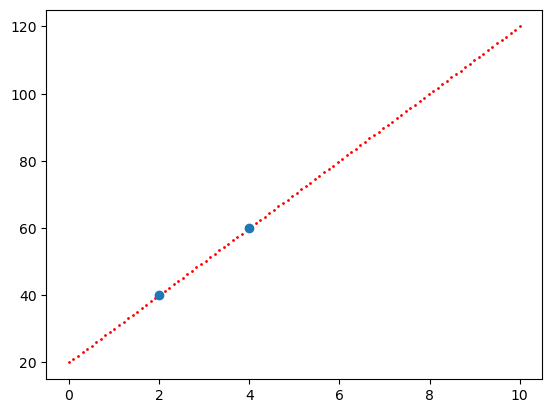

In [19]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(2,2))
plt.scatter(x_,h, c='r',s=1)
plt.scatter(x,y)
plt.show()

In [20]:
np.linalg.solve(X,Y) # 잘 쓰지는 않음

array([[10.],
       [20.]])

## 6.2 선형 연립 방정식 풀기(단별량 회귀분석): 독립변수1, 데이터 n개

In [22]:
x = np.array([32,64,96,118,126,144,152.5,158]) # 독립변수
y = np.array([18,24,61.5,49,52,105,130.3,125]) # 종속변수(타켓변수)

In [25]:
X = np.c_[x,np.ones(len(x))]
Y=y.reshape(-1,1)
X,Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [27]:
# X @ wb = Y
# X.T @ X @ wb = X.T @ Y
# X.T @ X : 정방행렬
# (X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y

#  wb = (X.T @ X)의 역행렬 @X.T @ Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [28]:
print('독립변수 x :',x)
print('실제값 y :',y)
h=wb[0]*x + wb[1]
print('예측값 h :',h)

독립변수 x : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
실제값 y : [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 h : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


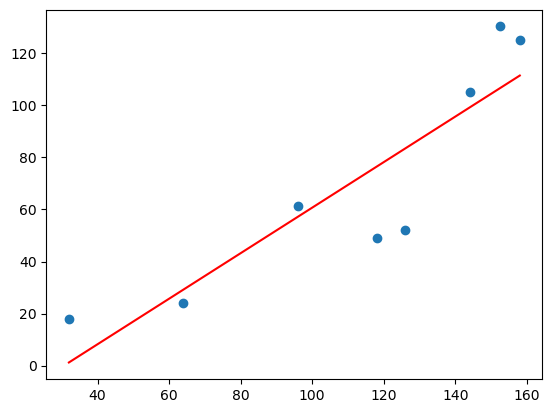

In [30]:
plt.plot(x,h,c='r') # 선그래프
plt.scatter(x,y)
plt.show()

# 7절 연습문제
## 실습형

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
iris_data = iris.data # 독립변수. 데이터 갯수는 150행
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [40]:
# 실습형 1. 각 변수별 평균(열별 평균)
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [42]:
# 실습형2. 처음 다섯개 행 출력
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [46]:
# 실습형3. 처음 다섯개 행에서 마지막 열 제외한 나머지 열 출력
iris1=iris_data[:5,:3]
iris1

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [47]:
# 실습형4. 처음 다섯개 행에서 마지막 열만 출력
iris2=iris_data[:5,3]
iris2

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [51]:
# 실습형5. 3번과 4번 배열을 원래 모양이 되도록 합치기
iris2=iris2.reshape(-1,1)
iris3= np.hstack((iris1,iris2))
iris3

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [128]:
answer1 = np.c_[iris1, iris2]
answer2 = np.column_stack((iris1, iris2))
# answer3 = np.hstack((iris1, iris2[:, np.newaxis]))
answer4 = np.hstack( (iris1, iris2.reshape(-1,1)))
# answer5 = np.hstack( (iris1, np.expand_dims(exiris2, axis=1)))
answer6 = np.concatenate( (iris1, iris2.reshape(-1, 1)), axis=1)

answers=[answer1,answer2,answer4,answer6]
all([np.all(answer1==answer) for answer in answers])

True

In [126]:
def same_all(*answers):

        if len(answers)>0:
            first=answers[0]
            return all([np.all(answer1==answer) for answer in answers])
        else:
            return False
same_all(answer1,answer2,answer4,answer6)

True

In [129]:
# 실습형6 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력
iris3_avg=iris3.mean(axis=0)
for i in range (0,4): # range(a.shape[1])를 쓰는 것을 추천
    iris4=iris3[:,i].copy()
    a = iris4[iris3[:,i]>iris3_avg[i]]
    print("{}번째 열: {}".format(i,a))

0번째 열: [5.1 4.9 5. ]
1번째 열: [3.5 3.6]
2번째 열: [1.5]
3번째 열: []


In [ ]:
# # 강사풀이 -깃허브서 확인할 것  
# iris_sample = iris_data[:5]
# print('데이터 ')

## 문제풀이형

In [92]:
# 1. 다음 보기의 데이터가 있을 경우 print(a.sum(0))의 결과는?
import numpy as np
a = np.arange(12).reshape(3,4)
a
'''
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
'''
print(a.sum(0))

'''
① 66
② [6 22 38]
③ [12 15 18 21]
④ 0

정답 : ③ [12 15 18 21]
      a.sum(0)은 각 배열의 열들의 합을 구하는 함수이다.
'''

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
# 2. a데이터가 다음과 같을 때 다음 중 차원을 바꿀 수 있는 방법을 모두 고르세요 (수정)
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a
'''
array([[3., 6., 4., 7.],
       [9., 7., 3., 1.],
       [4., 5., 0., 5.]])
'''
a.shape
'''
(3, 4)
'''
'''
① a.ravel() a는 바뀌지 않는다.(1차원으로만 반환할 뿐)
② a.reshape(6,2) a는 바뀌지 않는다.
③ a.resize((2,6))
④ a.T a는 바뀌지 않는다.

정답 : ③ a.resize((2,6)) 2행 6열의 배열로 만든다
'''

(3, 4)

In [111]:
# 3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶다. 빈칸에 들어갈 내용은?
import numpy as np
a = np.arange(12).reshape(3,4)
# _________________________
'''
array([[0, 1, 2, 3],
       [4, 5, 6, 7]])
'''

'''
① a[:2]
② a[:,:2] - 모든 행의 0,1번 열
③ a[1,2] - 배열의 1행의 2열의 값
④ a[1][2] - 3번과 같으나 잘 쓰이지 않음

정답 : ① a[:2]
'''

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [114]:
# 4. 다음 코드의 실행 결과는?
import numpy as np
a = np.array([1,2,3,4,5])
a[[1,3,4]]=0
a
'''
① [0 2 0 0 5]
② [1 0 3 0 0]
③ [1 2 3 4 5]
④ 프로그램오류, a=[1,3,4]=0 으로 코드를 수정해야 한다.
정답 : ② [1 0 3 0 0] a의 1,3,4번째 값을 0으로 바꾸는 코드이다.
'''

In [117]:
# 5 다음 두 배열 a,b를 출력의 예시처럼 만들고 싶을 때 빈 칸에 입력해야 할 내용으로 바른 것은?
import numpy as np
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
# _________________

'''
array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])
'''

'''
① np.r_[a,b]
② np.c_[a,b]
③ np.ix_(a,b)
④ [[a],[b]]

정답 : ② np.c_[a,b]
'''